In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os, copy
import pygem_eb.processing.gridsearch_processing as gsproc
import matplotlib as mpl

In [14]:
data_fn = '../Data/a_sat values/'
a_sat = {}
for f in os.listdir(data_fn):
    if '_20' in f:
        year = f.split('_')[-1].replace('.csv','')
        df = pd.read_csv(data_fn + f, index_col='Date')
        df = df['a_sat']
        df.index = pd.to_datetime(df.index)
        a_sat[year] = df

In [15]:
result_dict = gsproc.get_result_dict(force_redo=True)       # Add force_redo=True to recompile the result dictionaries
ds = gsproc.get_any('0.024','2.5','B',result_dict)

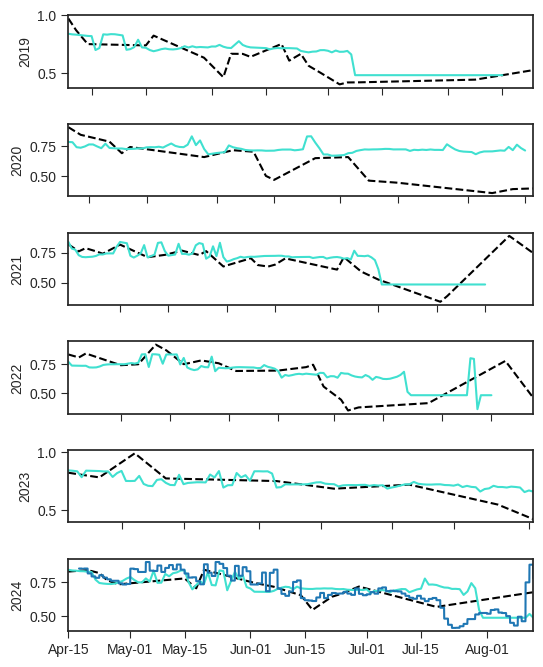

In [25]:
fig, axes = plt.subplots(len(a_sat), figsize=(6,8), gridspec_kw={'hspace':0.5})
for y,year in enumerate(a_sat):
    ax = axes[y]
    ax.plot(a_sat[year].index, a_sat[year].values, linestyle='--', color='k', label='Sentinel')

    ds_year = ds.sel(time=pd.date_range(f'{year}-04-01',f'{year}-08-15'))
    ax.plot(ds_year.time.values, ds_year['albedo'].values, color='turquoise', label='Model')

    ax.set_xlim(a_sat[year].index[0], a_sat[year].index[-1])
    ax.set_ylabel(year)

    if y < len(a_sat)-1:
        ax.tick_params(labelbottom=False)
    else:
        ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b-%d'))
    ax.tick_params(length=5)

    if year == '2024':
        df = pd.read_csv('../climate_data/AWS/Preprocessed/gulkana2024_bothalbedo.csv', index_col=0)
        df.index = pd.to_datetime(df.index)
        ax.plot(df.index, df['albedo'])

plt.show()